In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.dataset import CIFAR10Parser

In [5]:
parser = CIFAR10Parser(normalize=True)  # Use normalized data
train_images, train_labels = parser.get_train_data()
test_images, test_labels = parser.get_test_data()

In [6]:
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (50000, 3, 32, 32)
Test data shape: (10000, 3, 32, 32)


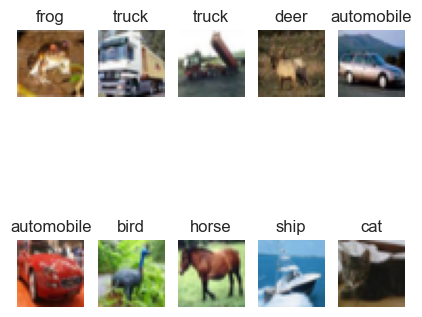

In [13]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Plot some sample images
def plot_sample_images(images, labels, num_images=10):
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].transpose(1, 2, 0))  # Converting (C, H, W) to (H, W, C)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels, num_images=10)

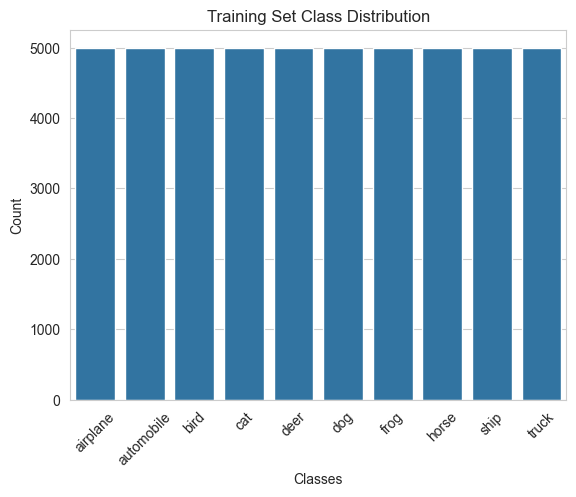

In [14]:
def plot_class_distribution(labels, title="Class Distribution"):
    sns.countplot(x=labels)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

# Plot class distribution for training data
plot_class_distribution(train_labels, title="Training Set Class Distribution")

In [15]:
def check_basic_statistics(images):
    print(f"Min pixel value: {images.min()}")
    print(f"Max pixel value: {images.max()}")
    print(f"Mean pixel value: {images.mean()}")
    print(f"Standard deviation of pixel values: {images.std()}")

# Checking basic statistics for training images
check_basic_statistics(train_images)


Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.4733648896217346
Standard deviation of pixel values: 0.25156906247138977


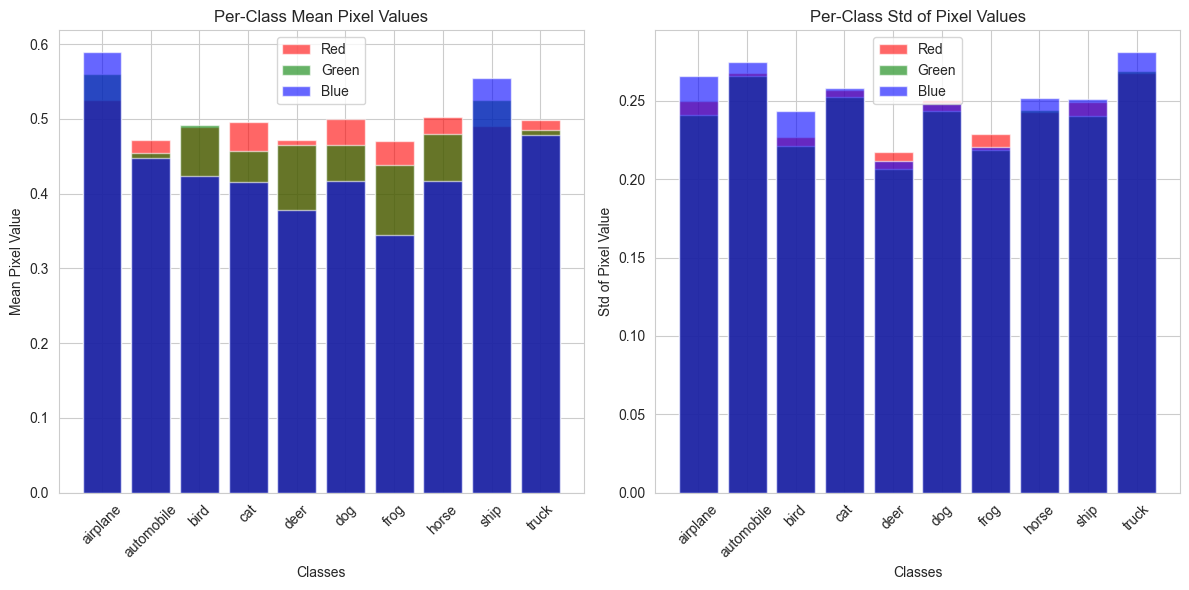

In [16]:
def visualize_class_statistics(images, labels):
    means = np.zeros((10, 3))
    stds = np.zeros((10, 3))
    
    for i in range(10):
        class_images = images[labels == i]
        means[i] = np.mean(class_images, axis=(0, 2, 3))  # Mean per channel (R, G, B)
        stds[i] = np.std(class_images, axis=(0, 2, 3))  # Std per channel (R, G, B)
    
    # Plot per-class mean and std
    x = np.arange(10)
    plt.figure(figsize=(12, 6))

    # Plot Mean
    plt.subplot(1, 2, 1)
    plt.bar(x, means[:, 0], color='r', alpha=0.6, label='Red')
    plt.bar(x, means[:, 1], color='g', alpha=0.6, label='Green')
    plt.bar(x, means[:, 2], color='b', alpha=0.6, label='Blue')
    plt.xticks(x, class_names, rotation=45)
    plt.title("Per-Class Mean Pixel Values")
    plt.xlabel("Classes")
    plt.ylabel("Mean Pixel Value")
    plt.legend()

    # Plot Std
    plt.subplot(1, 2, 2)
    plt.bar(x, stds[:, 0], color='r', alpha=0.6, label='Red')
    plt.bar(x, stds[:, 1], color='g', alpha=0.6, label='Green')
    plt.bar(x, stds[:, 2], color='b', alpha=0.6, label='Blue')
    plt.xticks(x, class_names, rotation=45)
    plt.title("Per-Class Std of Pixel Values")
    plt.xlabel("Classes")
    plt.ylabel("Std of Pixel Value")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualizing class statistics
visualize_class_statistics(train_images, train_labels)